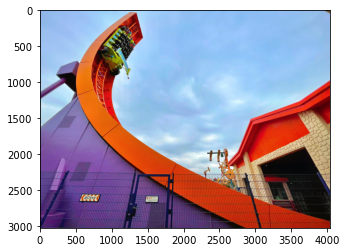

In [37]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Rexs Racer.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [38]:
import numpy as np
vec = img.reshape((-1, 3))
vec = np.float32(vec)/255
vec.shape

(12192768, 3)

In [42]:
# retval, bestLabels, centers = kmeans(data, K, bestLabels, criteria, attempts, flags, centers=None)
# 函数参数：
# data:  需要分类数据，最好是np.float32的数据，每个特征放一列。
# K:  聚类个数
# bestLabels：预设的分类标签或者None
# criteria：迭代停止的模式选择，这是一个含有三个元素的元组型数。格式为（type, max_iter, epsilon） 其中，type有如下模式：
# cv2.TERM_CRITERIA_EPS ：精确度（误差）满足epsilon，则停止。
# cv2.TERM_CRITERIA_MAX_ITER：迭代次数超过max_iter，则停止。
# cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER：两者结合，满足任意一个结束。
# attempts：重复试验kmeans算法次数，将会返回最好的一次结果
# flags：初始中心选择，可选以下两种：
# cv2.KMEANS_PP_CENTERS：使用kmeans++算法的中心初始化算法，即初始中心的选择使眼色相差最大.详细可查阅kmeans++算法。(Use kmeans++ center initialization by Arthur and Vassilvitskii)
# cv2.KMEANS_RANDOM_CENTERS：每次随机选择初始中心（Select random initial centers in each attempt.）
# 返回值：
# compactness：紧密度，返回每个点到相应重心的距离的平方和
# labels：结果标记，每个成员被标记为分组的序号，如 0,1,2,3,4...等
# centers：由聚类的中心组成的数组
criteria_stop = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1)
K = 5
attempts = 10
flags = cv2.KMEANS_PP_CENTERS
retval, bestLabels, centers = cv2.kmeans(vec, K, None, criteria_stop, attempts, flags, centers=None)
centers = np.int32(centers * 255)
bestLabels.shape, centers.shape, centers

((12192768, 1),
 (5, 3),
 array([[118,  88, 154],
        [160, 199, 251],
        [201,  57,  16],
        [ 43,  23,  44],
        [204, 166, 124]], dtype=int32))

In [43]:
res = centers[bestLabels.flatten()]
result = res.reshape((img.shape))
result.shape

(3024, 4032, 3)

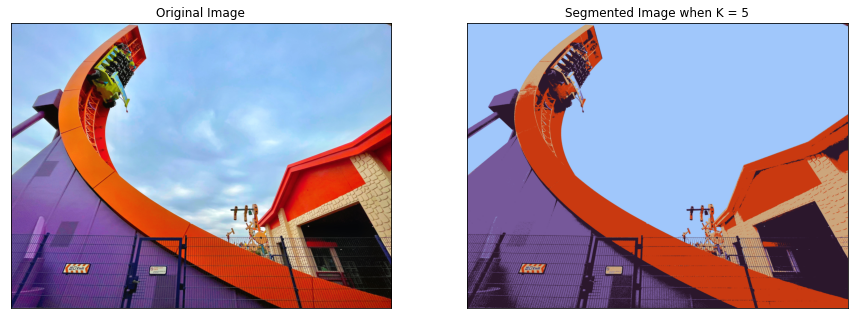

In [44]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result)
plt.title('Segmented Image when K = {:d}'.format(K)), plt.xticks([]), plt.yticks([])
plt.show()

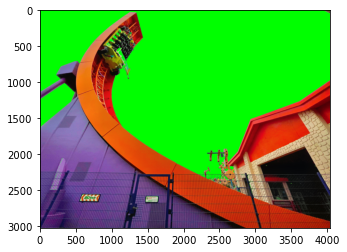

In [46]:
# disable only the cluster number 2 (turn the pixel into green) (green sky)
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[bestLabels.flatten() == cluster] = [0, 255, 0]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
plt.imshow(masked_image)
plt.show()